In [60]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("C:\\Users\\Varun\\Downloads\\archive (5)\\Heart_Disease_Prediction.csv")

In [62]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [63]:
df["Heart Disease"].replace("Presence", 1, inplace = True)
df["Heart Disease"].replace("Absence", 0, inplace = True)
df.head()

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0         7              1  
3                        1         7              0  
4                        1         3              0

<AxesSubplot:>

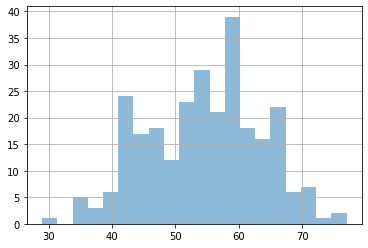

In [64]:
df['Age'].hist(alpha=0.5,bins=20)

C:\Users\Varun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

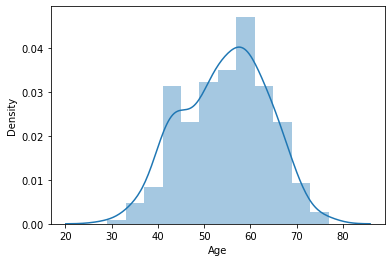

In [65]:
sns.distplot(df['Age'].dropna(),kde=True)

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

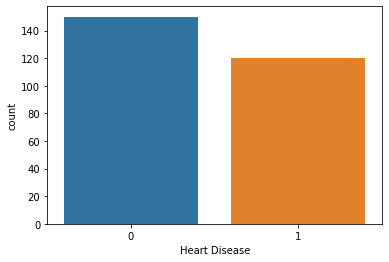

In [66]:
sns.countplot(x='Heart Disease',data=df)

<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

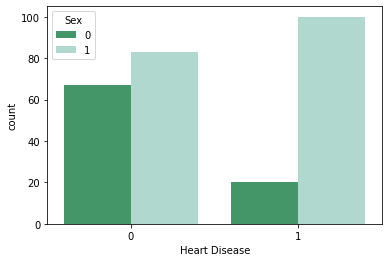

In [67]:
sns.countplot(x='Heart Disease',hue="Sex",data=df,palette='BuGn_r')

In [68]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [70]:
len(x_train)

216

In [71]:
len(x_test)

54

In [72]:
model=LogisticRegression()
model.fit(x_train,y_train)
model.predict([[70,1,4,130,322,0,2,109,0,2.4,2,3,3]])


C:\Users\Varun\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1], dtype=int64)

In [73]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)

77.77777777777779


In [74]:
model1=GaussianNB()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)

79.62962962962963


In [75]:
model2=SVC()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)

70.37037037037037


In [76]:
df_mn=(df-df.mean())/df.std()
df_mn.head()
x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_n1 = pd.DataFrame(x_scaled)
df_n1.head()

0    1         2         3         4    5    6         7    8   \
0  0.854167  1.0  1.000000  0.339623  0.447489  0.0  1.0  0.290076  0.0   
1  0.791667  0.0  0.666667  0.198113  1.000000  0.0  1.0  0.679389  0.0   
2  0.583333  1.0  0.333333  0.283019  0.308219  0.0  0.0  0.534351  0.0   
3  0.729167  1.0  1.000000  0.320755  0.312785  0.0  0.0  0.259542  1.0   
4  0.937500  0.0  0.333333  0.245283  0.326484  0.0  1.0  0.381679  1.0   

         9    10        11   12   13  
0  0.387097  0.5  1.000000  0.0  1.0  
1  0.258065  0.5  0.000000  1.0  0.0  
2  0.048387  0.0  0.000000  1.0  1.0  
3  0.032258  0.5  0.333333  1.0  0.0  
4  0.032258  0.0  0.333333  0.0  0.0

In [77]:
df_mn=(df-df.mean())/df.std()
df_mn.head()

Age       Sex  Chest pain type        BP  Cholesterol  FBS over 120  \
0  1.708920  0.688222         0.869313 -0.075270     1.399613     -0.416256   
1  1.379578 -1.447639        -0.183219 -0.915060     6.081711     -0.416256   
2  0.281771  0.688222        -1.235750 -0.411186     0.219415     -0.416256   
3  1.050236  0.688222         0.869313 -0.187242     0.258110     -0.416256   
4  2.148043 -1.447639        -1.235750 -0.635130     0.374195     -0.416256   

   EKG results    Max HR  Exercise angina  ST depression  Slope of ST  \
0     0.979844 -1.755947        -0.699923       1.178823     0.675165   
1     0.979844  0.445582        -0.699923       0.480261     0.675165   
2    -1.024382 -0.374596        -0.699923      -0.654902    -0.952466   
3    -1.024382 -1.928616         1.423438      -0.742222     0.675165   
4     0.979844 -1.237940         1.423438      -0.742222    -0.952466   

   Number of vessels fluro  Thallium  Heart Disease  
0                 2.468099 -0.874083       1.115962  
1                -0.710216  1.187073      -0.892769  
2                -0.710216  1.187073       1.115962  
3                 0.349222  1.187073      -0.892769  
4                 0.349222 -0.874083      -0.892769

In [78]:
df.rename(columns={'Heart Disease': 'Outcome'})

Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  \
0       109                0            2.4            2   
1       160                0            1.6            2   
2       141                0            0.3            1   
3       105                1            0.2            2   
4       121                1            0.2            1   
..      ...              ...            ...          ...   
265     162                0            0.5            1   
266     173                0            0.0            1   
267     153                0            1.3            2   
268     148                0            0.4            2   
269     108                1            1.5            2   

     Number of vessels fluro  Thallium  Outcome  
0                          3         3        1  
1                          0         7        0  
2                          0         7        1  
3                          1         7        0  
4                          1         3        0  
..                       ...       ...      ...  
265                        0         7        0  
266                        0         7        0  
267                        0         3        0  
268                        0         6        0  
269                        3         3        1  

[270 rows x 14 columns]

In [79]:
knn_9 = KNeighborsClassifier(9)
knn_9.fit(x_train,y_train)
print(knn_9.score(x_test,y_test))

0.6481481481481481


In [80]:
model4=RandomForestClassifier()
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)

81.48148148148148


In [81]:
model5=AdaBoostClassifier()
model5.fit(x_train,y_train)
y_pred=model5.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy*100)

79.62962962962963


In [85]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [86]:
cross_val_score(SVC(C=10,gamma='auto',kernel="linear"),X,y,cv=5)

array([0.7962963 , 0.7962963 , 0.87037037, 0.81481481, 0.81481481])

In [87]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(SVC(),
                 {
                     'C':[1,4,5,6,7,8,10],
                     'kernel':['rbf','linear'],
                     'gamma':['auto','scale']
                      
                 },cv=4,return_train_score=True)

gs.fit(X,y)
gs.cv_results_

{'mean_fit_time': array([ 0.04400063,  3.34604931,  0.02887392,  2.95699775,  0.03825015,
         8.3323732 ,  0.06398833,  7.67434245,  0.03036648, 10.39326763,
         0.04975075,  8.87605125,  0.03573906, 13.66393274,  0.03124917,
        12.69055575,  0.05403066, 14.3644582 ,  0.02734464, 14.67950165,
         0.03125018, 15.50002432,  0.03053498, 16.11510658,  0.03343105,
        11.87884051,  0.02306199, 12.39314502]),
 'std_fit_time': array([1.17248083e-02, 1.99077577e+00, 6.40769129e-03, 1.51505466e+00,
        1.48176407e-03, 1.60672916e+00, 4.43182023e-02, 2.35648323e+00,
        1.54035183e-03, 3.33770053e+00, 7.49412310e-03, 3.42332339e+00,
        6.56345236e-03, 5.30156263e+00, 2.14245328e-06, 5.86427749e+00,
        1.71778539e-02, 4.15876325e+00, 6.76551654e-03, 4.17543483e+00,
        2.95088143e-06, 6.96706151e+00, 1.00576540e-02, 8.01498455e+00,
        4.67473858e-03, 2.48140360e+00, 7.51355566e-03, 3.36200992e+00]),
 'mean_score_time': array([0.02650231, 0.031566

In [88]:
df1 = pd.DataFrame(gs.cv_results_)
df1

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0        0.044001      0.011725         0.026502        0.003038       1   
1        3.346049      1.990776         0.031566        0.021073       1   
2        0.028874      0.006408         0.017218        0.002757       1   
3        2.956998      1.515055         0.015908        0.001237       1   
4        0.038250      0.001482         0.030006        0.007841       4   
5        8.332373      1.606729         0.015409        0.009498       4   
6        0.063988      0.044318         0.026611        0.007699       4   
7        7.674342      2.356483         0.015908        0.002126       4   
8        0.030366      0.001540         0.019529        0.006768       5   
9       10.393268      3.337701         0.024818        0.013504       5   
10       0.049751      0.007494         0.059255        0.013971       5   
11       8.876051      3.423323         0.007814        0.007814       5   
12       0.035739      0.006563         0.021128        0.006398       6   
13      13.663933      5.301563         0.021471        0.010125       6   
14       0.031249      0.000002         0.019531        0.006765       6   
15      12.690556      5.864277         0.016472        0.001458       6   
16       0.054031      0.017178         0.033937        0.014951       7   
17      14.364458      4.158763         0.021625        0.014651       7   
18       0.027345      0.006766         0.020866        0.006379       7   
19      14.679502      4.175435         0.016163        0.000725       7   
20       0.031250      0.000003         0.023441        0.007809       8   
21      15.500024      6.967062         0.015063        0.010269       8   
22       0.030535      0.010058         0.018216        0.004490       8   
23      16.115107      8.014985         0.015661        0.000407       8   
24       0.033431      0.004675         0.020662        0.010936      10   
25      11.878841      2.481404         0.011816        0.006823      10   
26       0.023062      0.007514         0.017312        0.002199      10   
27      12.393145      3.362010         0.011907        0.007020      10   

   param_gamma param_kernel                                           params  \
0         auto          rbf       {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}   
1         auto       linear    {'C': 1, 'gamma': 'auto', 'kernel': 'linear'}   
2        scale          rbf      {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}   
3        scale       linear   {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}   
4         auto          rbf       {'C': 4, 'gamma': 'auto', 'kernel': 'rbf'}   
5         auto       linear    {'C': 4, 'gamma': 'auto', 'kernel': 'linear'}   
6        scale          rbf      {'C': 4, 'gamma': 'scale', 'kernel': 'rbf'}   
7        scale       linear   {'C': 4, 'gamma': 'scale', 'kernel': 'linear'}   
8         auto          rbf       {'C': 5, 'gamma': 'auto', 'kernel': 'rbf'}   
9         auto       linear    {'C': 5, 'gamma': 'auto', 'kernel': 'linear'}   
10       scale          rbf      {'C': 5, 'gamma': 'scale', 'kernel': 'rbf'}   
11       scale       linear   {'C': 5, 'gamma': 'scale', 'kernel': 'linear'}   
12        auto          rbf       {'C': 6, 'gamma': 'auto', 'kernel': 'rbf'}   
13        auto       linear    {'C': 6, 'gamma': 'auto', 'kernel': 'linear'}   
14       scale          rbf      {'C': 6, 'gamma': 'scale', 'kernel': 'rbf'}   
15       scale       linear   {'C': 6, 'gamma': 'scale', 'kernel': 'linear'}   
16        auto          rbf       {'C': 7, 'gamma': 'auto', 'kernel': 'rbf'}   
17        auto       linear    {'C': 7, 'gamma': 'auto', 'kernel': 'linear'}   
18       scale          rbf      {'C': 7, 'gamma': 'scale', 'kernel': 'rbf'}   
19       scale       linear   {'C': 7, 'gamma': 'scale', 'kernel': 'linear'}   
20        auto          rbf       {'C': 8, 'gamma': 'auto', 'kernel': 'rbf'}   
21        auto       linear    {'C': 8,

In [89]:
df1[['param_C','param_gamma','param_kernel','mean_test_score']]

param_C param_gamma param_kernel  mean_test_score
0        1        auto          rbf         0.559263
1        1        auto       linear         0.840814
2        1       scale          rbf         0.662862
3        1       scale       linear         0.840814
4        4        auto          rbf         0.570347
5        4        auto       linear         0.848277
6        4       scale          rbf         0.685086
7        4       scale       linear         0.848277
8        5        auto          rbf         0.570347
9        5        auto       linear         0.848277
10       5       scale          rbf         0.688817
11       5       scale       linear         0.848277
12       6        auto          rbf         0.570347
13       6        auto       linear         0.848277
14       6       scale          rbf         0.688872
15       6       scale       linear         0.848277
16       7        auto          rbf         0.570347
17       7        auto       linear         0.844655
18       7       scale          rbf         0.699956
19       7       scale       linear         0.844655
20       8        auto          rbf         0.570347
21       8        auto       linear         0.848332
22       8       scale          rbf         0.703633
23       8       scale       linear         0.848332
24      10        auto          rbf         0.570347
25      10        auto       linear         0.840869
26      10       scale          rbf         0.714772
27      10       scale       linear         0.840869

In [90]:
gs.best_params_

{'C': 8, 'gamma': 'auto', 'kernel': 'linear'}

In [91]:
gs.best_score_

0.8483318700614574

In [92]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(SVC(),
                 {
                     'C':[1,4,5,6,7,8,10],
                     'kernel':['rbf','linear'],
                     'gamma':['auto','scale']
                      
                 },cv=4,return_train_score=True,n_iter=4)

rs.fit(X,y)
rs.cv_results_

{'mean_fit_time': array([1.95906466, 9.86779702, 0.02262712, 5.32973254]),
 'std_fit_time': array([0.91285742, 2.02919716, 0.00709295, 0.64381481]),
 'mean_score_time': array([0.0195303 , 0.01472217, 0.0241074 , 0.00601858]),
 'std_score_time': array([0.00676555, 0.00156885, 0.00796819, 0.00601864]),
 'param_kernel': masked_array(data=['linear', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=['scale', 'scale', 'scale', 'auto'],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[1, 10, 1, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'linear', 'gamma': 'scale', 'C': 1},
  {'kernel': 'linear', 'gamma': 'scale', 'C': 10},
  {'kernel': 'rbf', 'gamma': 'scale', 'C': 1},
  {'kernel': 'linear', 'gamma': 'auto', 'C': 4}

In [93]:
df2 = pd.DataFrame(rs.cv_results_)
df2

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_kernel  \
0       1.959065      0.912857         0.019530        0.006766       linear   
1       9.867797      2.029197         0.014722        0.001569       linear   
2       0.022627      0.007093         0.024107        0.007968          rbf   
3       5.329733      0.643815         0.006019        0.006019       linear   

  param_gamma param_C                                           params  \
0       scale       1   {'kernel': 'linear', 'gamma': 'scale', 'C': 1}   
1       scale      10  {'kernel': 'linear', 'gamma': 'scale', 'C': 10}   
2       scale       1      {'kernel': 'rbf', 'gamma': 'scale', 'C': 1}   
3        auto       4    {'kernel': 'linear', 'gamma': 'auto', 'C': 4}   

   split0_test_score  split1_test_score  ...  split3_test_score  \
0           0.823529           0.838235  ...           0.865672   
1           0.808824           0.838235  ...           0.880597   
2           0.647059           0.705882  ...           0.701493   
3           0.823529           0.838235  ...           0.895522   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.840814        0.015397                3            0.851485   
1         0.840869        0.025679                2            0.856436   
2         0.662862        0.044521                4            0.673267   
3         0.848277        0.027841                1            0.851485   

   split1_train_score  split2_train_score  split3_train_score  \
0            0.856436            0.871921            0.871921   
1            0.871287            0.862069            0.876847   
2            0.663366            0.684729            0.645320   
3            0.851485            0.862069            0.866995   

   mean_train_score  std_train_score  
0          0.862941         0.009149  
1          0.866660         0.007918  
2          0.666671         0.014460  
3          0.858009         0.006752  

[4 rows x 21 columns]

In [94]:
df2[['param_C','param_gamma','param_kernel','mean_test_score']]

param_C param_gamma param_kernel  mean_test_score
0       1       scale       linear         0.840814
1      10       scale       linear         0.840869
2       1       scale          rbf         0.662862
3       4        auto       linear         0.848277

In [95]:
rs.best_params_

{'kernel': 'linear', 'gamma': 'auto', 'C': 4}